# Проект Tinkoff: Влияние ĸоммуниĸаций на ĸлиентов банка 

In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy.optimize import curve_fit

## Предобработка 

In [3]:
df = pd.read_csv('tinkoff_chashback.csv', sep=',') #загружаем файл

In [4]:
df.head(5)

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0


In [5]:
df.info() #изучим основную информацию о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   Air                    50000 non-null  float64
 9   Beauty shop            50000 non-null  float64
 10  Book store             50000 non-null  float64
 11  Children               50000 non-null  float64
 12  Cinema                 50000 non-null  float64
 13  Clothes                50000 non-null  float64
 14  Electronics            50000 non-null  float64
 15  Fa

In [6]:
# переведем заголовки к удобному виду 
df.columns = df.columns.str.lower() # в нижний регистр
df.columns = df.columns.str.strip() # удалим пробелы

In [7]:
df.head()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,air,beauty shop,...,fastfood_before,fuel_before,house_before,jewelry_before,other_before,pet shop_before,pharmacies_before,supermarkets_before,taxi_before,transport_before
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,498.0,157.0,2621.0,31.0,6232.0,0.0,91.0,5356.0,0.0,119.0
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,2.0
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,527.0,398.0,788.0,0.0,9797.0,0.0,1.0,371.0,0.0,458.0
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,227.0,0.0,0.0,0.0,208.0,0.0,14.0,338.0,0.0,10.0
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,452.0,372.0,0.0,76.0,486.0,0.0,499.0,2198.0,0.0,14.0


In [8]:
# посмотрим на пропуски
df.isna().sum()

client_id                0
cb_merch_last_3_month    0
cb_bank_last_3_month     0
cb_merch_before          0
cb_bank_before           0
cnt_communication        0
cnt_activation           0
cnt_view                 0
air                      0
beauty shop              0
book store               0
children                 0
cinema                   0
clothes                  0
electronics              0
fastfood                 0
fuel                     0
house                    0
jewelry                  0
other                    0
pet shop                 0
pharmacies               0
supermarkets             0
taxi                     0
transport                0
air_before               0
beauty shop_before       0
book store_before        0
children_before          0
cinema_before            0
clothes_before           0
electronics_before       0
fastfood_before          0
fuel_before              0
house_before             0
jewelry_before           0
other_before             0
p

In [9]:
df.duplicated().sum() #посмотрим количество явных дубликатов в наших данных

0

### 1. Как взаимосвязаны коммуникации на покупки с кэшбэком?

Гипотеза: существует взаимосвязь между отправленными коммуникациями и покупками с кешбэком. При этом этом чем больше коммуникаций было отправлено, тем больше вероятность, что клиент сделал покупку с кешбеком.

In [10]:
# создаем столбец суммы всех кэшбэков
df['cb_sum'] = df['cb_merch_before'] + df['cb_merch_last_3_month'] + df['cb_bank_before'] + df['cb_bank_last_3_month']

In [11]:
# создаем столбец суммы кэшбэков для банков и партнеров
df['cb__bank_sum'] = df['cb_bank_before'] + df['cb_bank_last_3_month']
df['cb__merch_sum'] = df['cb_merch_before'] + df['cb_merch_last_3_month']

In [12]:
df_1 = df[['client_id', 'cb_sum', 'cnt_communication']]
df_1

,client_id,cb_sum,cnt_communication
0,162353149,667.0,6
1,666605735,0.0,0
2,558610079,0.0,0
3,769974329,427.0,3
4,350605405,358.0,4
...,...,...,...
49995,377949465,2555.0,3
49996,299560244,136.0,1
49997,66958117,448.0,1
49998,549553108,488.0,3


Точечно-бисериальная корреляция  - это статистическая мера, которая измеряет силу и направление взаимосвязи между двумя переменными: одна переменная является непрерывной, а другая - бинарной (дихотомической)

In [13]:
# создаем столбец, если покупка была с кэшбэком, то 1, если нет, то 0
df_1['pur_with_cb'] = df_1['cb_sum'].apply(lambda x: 1 if x > 0 else 0)
df_1

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\643934143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['pur_with_cb'] = df_1['cb_sum'].apply(lambda x: 1 if x > 0 else 0)


,client_id,cb_sum,cnt_communication,pur_with_cb
0,162353149,667.0,6,1
1,666605735,0.0,0,0
2,558610079,0.0,0,0
3,769974329,427.0,3,1
4,350605405,358.0,4,1
...,...,...,...,...
49995,377949465,2555.0,3,1
49996,299560244,136.0,1,1
49997,66958117,448.0,1,1
49998,549553108,488.0,3,1


In [14]:
df_1.cov()

,client_id,cb_sum,cnt_communication,pur_with_cb
client_id,5.663208e+16,-4.811012e+10,3.559022e+07,4.739510e+06
cb_sum,-4.811012e+10,6.513959e+06,2.889049e+02,1.717939e+02
cnt_communication,3.559022e+07,2.889049e+02,3.123936e+00,1.070553e-01
pur_with_cb,4.739510e+06,1.717939e+02,1.070553e-01,1.224106e-01


In [15]:
df_1.corr(method='kendall')

,client_id,cb_sum,cnt_communication,pur_with_cb
client_id,1.000000,-0.003511,0.053905,0.045905
cb_sum,-0.003511,1.000000,0.120494,0.500024
cnt_communication,0.053905,0.120494,1.000000,0.162729
pur_with_cb,0.045905,0.500024,0.162729,1.000000


In [16]:
st.pointbiserialr(df_1['cnt_communication'], df_1['pur_with_cb'])

SignificanceResult(statistic=0.17312015246662177, pvalue=0.0)

p-value < 0.05, это говорит о том, что есть основания отвергнуть нулевую гипотезу о том, что нет корреляции между cnt_communication и pur_with_cb. Это означает, что есть статистически значимая корреляция между рассматриваемыми переменными.

# -------------------------------------------------------------------------------------------

Гипотеза: чем больше коммуникаций было отправлено, тем больший кэшбэк получил клиент.

# Работаем с cb_sum

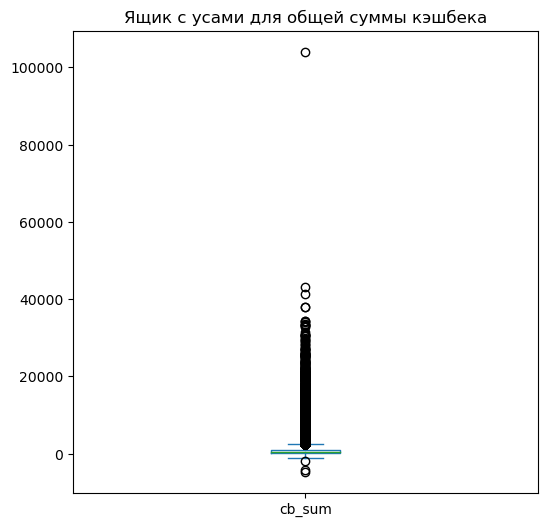

In [17]:
plt.figure(figsize=(6, 6))
df_1['cb_sum'].plot(kind='box', title='Ящик с усами для общей суммы кэшбека')
plt.show()

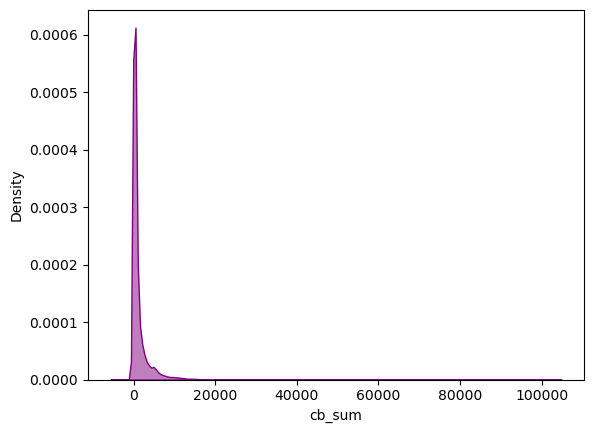

In [18]:
sns.kdeplot(df_1['cb_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

In [19]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_1['cb_sum'])

outliers = (df_1['cb_sum'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 1140


In [20]:
#перезапишем датасет без выбросов по полю cb_sum
df_1_no_outliers = df_1[(z_scores < 3) & (z_scores > -3)]

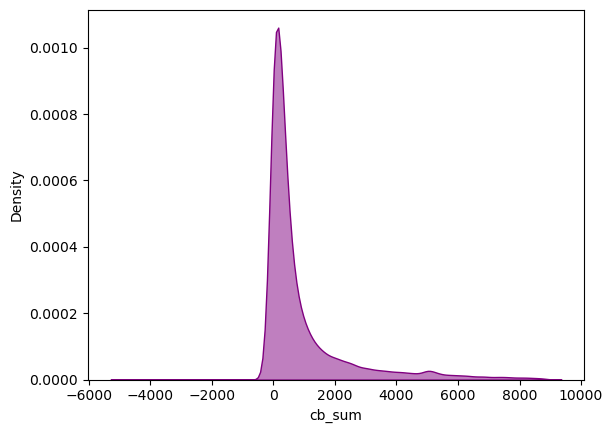

In [21]:
sns.kdeplot(df_1_no_outliers['cb_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

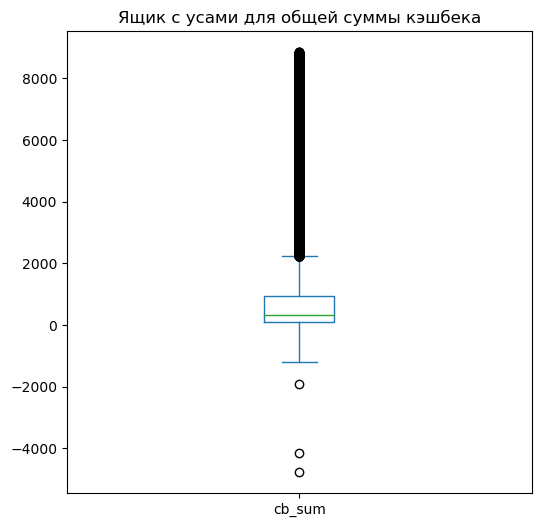

In [22]:
plt.figure(figsize=(6, 6))
df_1_no_outliers['cb_sum'].plot(kind='box', title='Ящик с усами для общей суммы кэшбека')
plt.show()

In [23]:
# удалим выбросы, где сумма кешбека меньше 0 и перезапишем датасет
df_1_no_outliers = df_1_no_outliers.query("cb_sum > 0")

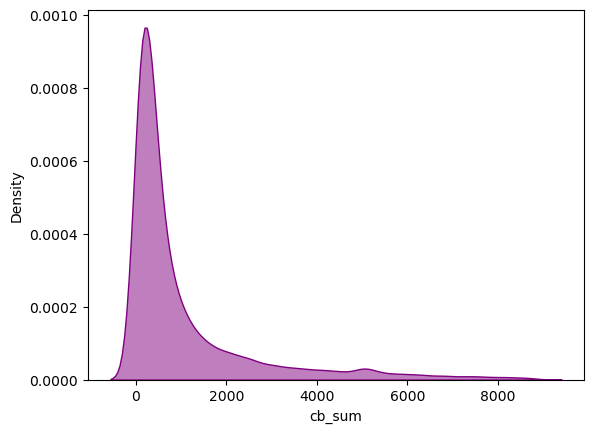

In [24]:
sns.kdeplot(df_1_no_outliers['cb_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

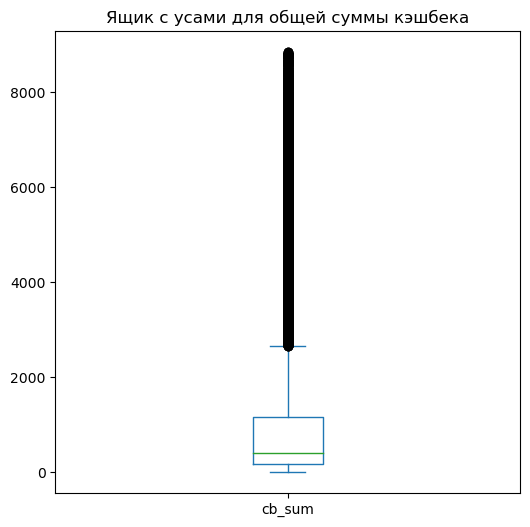

In [25]:
plt.figure(figsize=(6, 6))
df_1_no_outliers['cb_sum'].plot(kind='box', title='Ящик с усами для общей суммы кэшбека')
plt.show()

# Работаем с cnt_communication

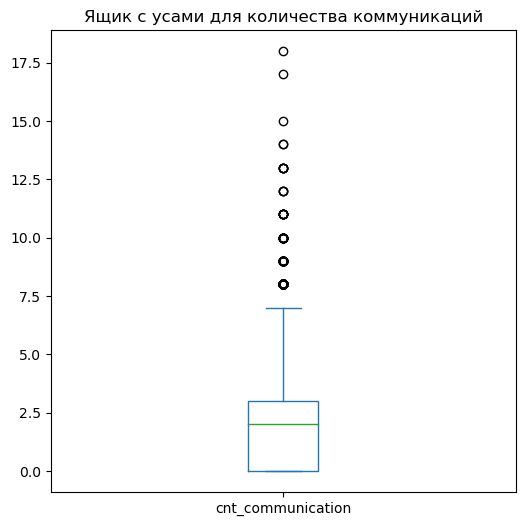

In [26]:
plt.figure(figsize=(6, 6))
df_1_no_outliers['cnt_communication'].plot(kind='box', title='Ящик с усами для количества коммуникаций')
plt.show()

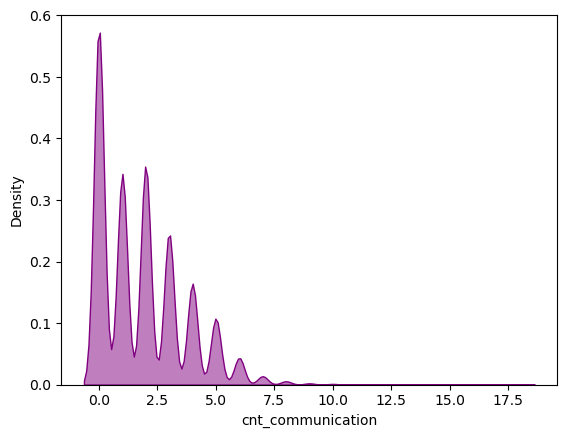

In [27]:
sns.kdeplot(df_1_no_outliers['cnt_communication'], color='purple', alpha=0.5, fill=True)
plt.show()

In [28]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_1_no_outliers['cnt_communication'])

outliers = (df_1_no_outliers['cnt_communication'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 214


In [29]:
#перезапишем датасет без выбросов по полю cb_sum
df_1_no_outliers = df_1_no_outliers[(z_scores < 3) & (z_scores > -3)]

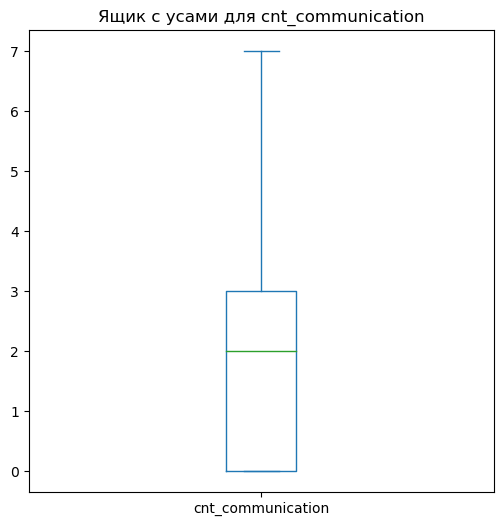

In [31]:
plt.figure(figsize=(6, 6))
df_1_no_outliers['cnt_communication'].plot(kind='box', title='Ящик с усами для cnt_communication')
plt.show()

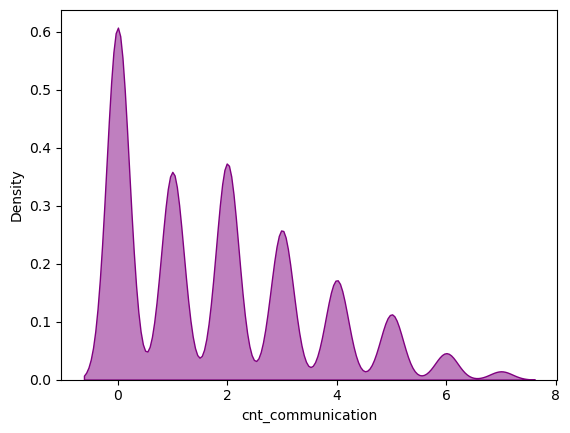

In [32]:
sns.kdeplot(df_1_no_outliers['cnt_communication'], color='purple', alpha=0.5, fill=True)
plt.show()

In [33]:
# датасет без выбросов
df_1_no_outliers

,client_id,cb_sum,cnt_communication,pur_with_cb
0,162353149,667.0,6,1
3,769974329,427.0,3,1
4,350605405,358.0,4,1
6,278555633,204.0,4,1
7,155755732,3169.0,0,1
...,...,...,...,...
49995,377949465,2555.0,3,1
49996,299560244,136.0,1,1
49997,66958117,448.0,1,1
49998,549553108,488.0,3,1


# Проверим распределения

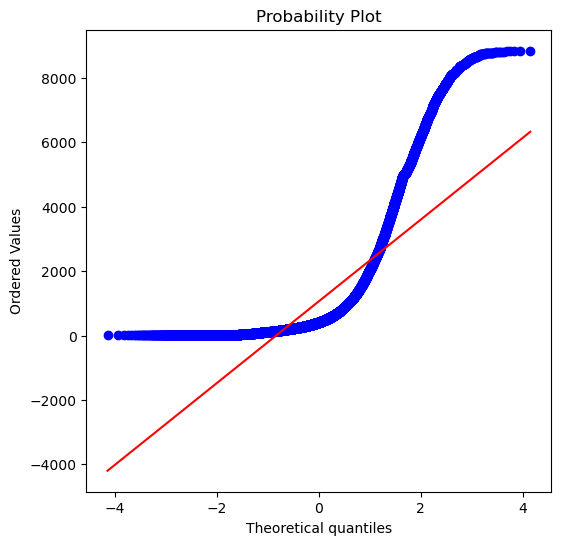

In [34]:
plt.figure(figsize=(6, 6))
st.probplot(df_1_no_outliers['cb_sum'], dist='norm', plot=plt)
plt.show()

In [35]:
# проверьте распределение с помощью теста Шапиро-Уилка
stat, p = st.shapiro(df_1_no_outliers['cb_sum'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения


C:\Users\Elizaveta\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


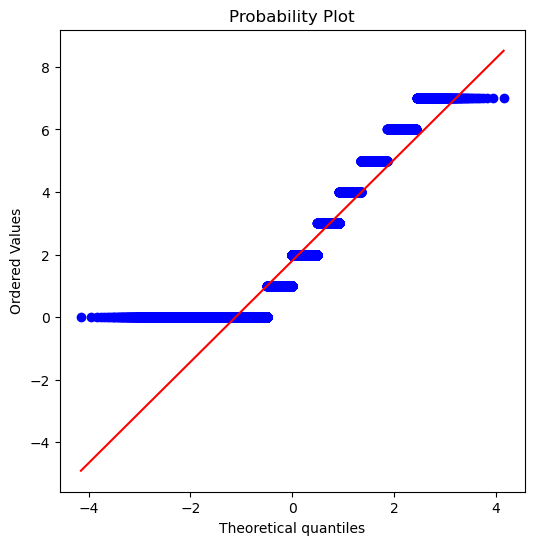

In [36]:
plt.figure(figsize=(6, 6))
st.probplot(df_1_no_outliers['cnt_communication'], dist='norm', plot=plt)
plt.show()

In [37]:
# проверьте распределение с помощью теста Шапиро-Уилка
stat, p = st.shapiro(df_1_no_outliers['cnt_communication'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

0.0 Отвергаем нулевую гипотезу. Выборка не имеет нормального распределения


In [38]:
df_1_no_outliers.cov()

,client_id,cb_sum,cnt_communication,pur_with_cb
client_id,5.816702e+16,-3.071853e+10,3.106414e+07,0.0
cb_sum,-3.071853e+10,2.442756e+06,1.144702e+02,0.0
cnt_communication,3.106414e+07,1.144702e+02,2.967342e+00,0.0
pur_with_cb,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Таким образом, выборка не имеет нормального распределения, значит используем либо метод Спирмена, либо метод Кендала, но в наших исходных данных много выбросов, поэтому используем Кендала 

In [39]:
df_1_no_outliers.corr(method='kendall')

,client_id,cb_sum,cnt_communication,pur_with_cb
client_id,1.000000,-0.024577,0.050294,NaN
cb_sum,-0.024577,1.000000,0.051876,NaN
cnt_communication,0.050294,0.051876,1.000000,NaN
pur_with_cb,NaN,NaN,NaN,1.0


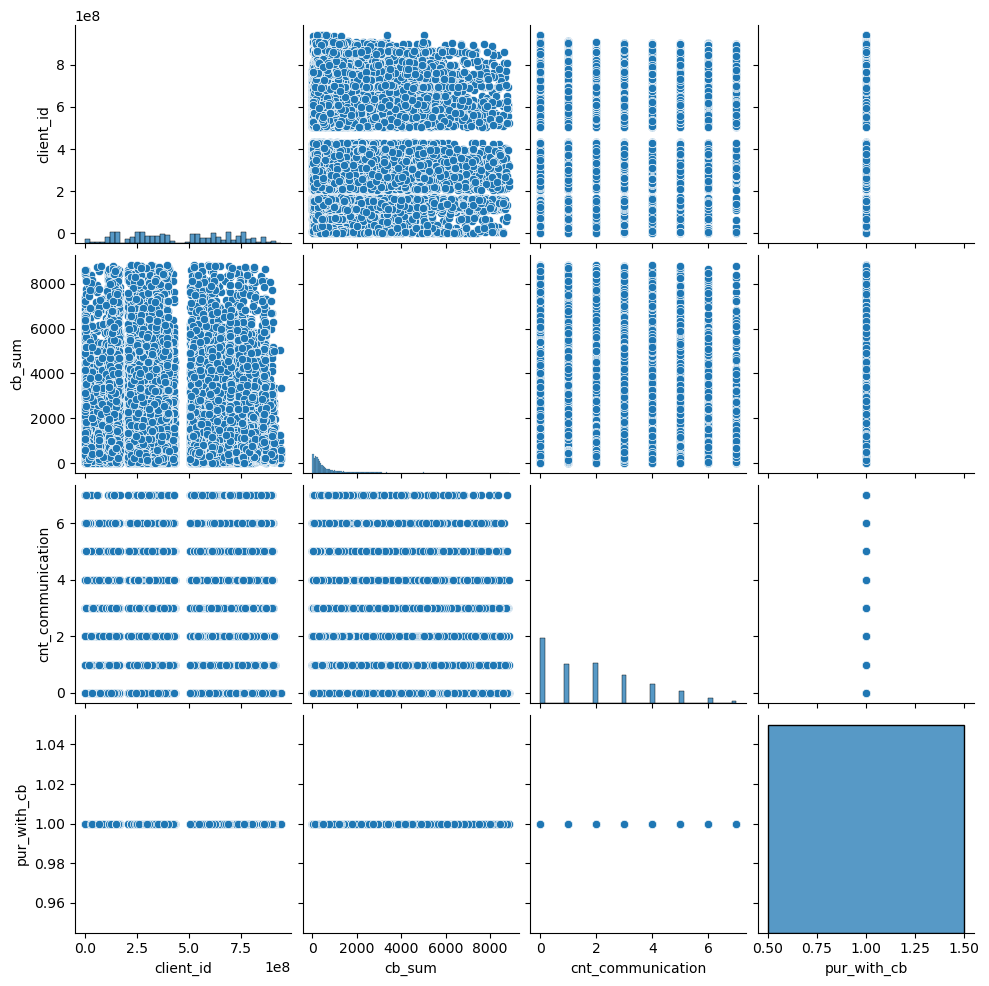

In [40]:
sns.pairplot(df_1_no_outliers)

Коэффициент корреляции между числом отправленных коммуникаций о кэшбэках и числом активированных предложений за последние 3 месяца показало значение 0.05, что соответсвует очень слабой связи (по шкале Чеддока). Таким образом, говорить о связи между этими двумя показателями нельзя

<Axes: xlabel='cnt_communication', ylabel='cb_sum'>

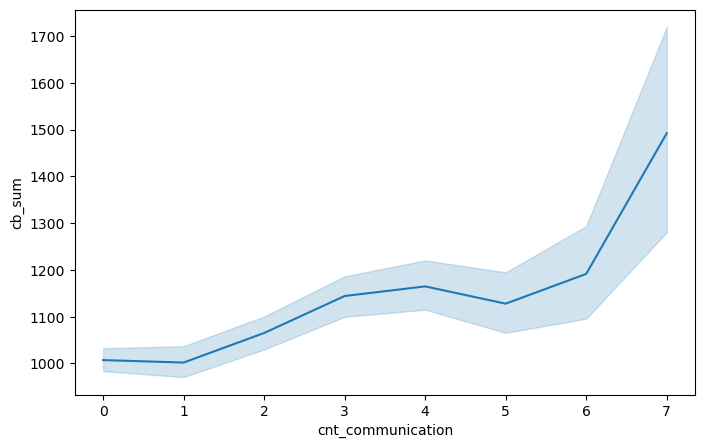

In [41]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_1_no_outliers,
            x='cnt_communication',
            y='cb_sum'
            )

### 2. Как взаимосвязаны обороты клиентов и выплаченный кэшбэк?

Оборот клиентов относится к совокупному объему денежных средств, которые клиенты тратят на определенные товары или услуги за определенный период времени. В контексте нашего вопроса оборот клиентов будет отражать сумму денег, потраченных клиентами на товары или услуги, связанные с программой кэшбэка.

Гипотеза: чем больше сумма кэшбэка, тем больше сумма, потраченная клиентами

In [45]:
# создаем столбец суммы всех всех покупок
df['pur_sum'] = df.iloc[:, 8:42].sum(axis=1)

In [46]:
df_2 = df[['client_id', 'cb_sum','pur_sum']]
df_2

,client_id,cb_sum,pur_sum
0,162353149,667.0,29632.0
1,666605735,0.0,14.0
2,558610079,0.0,22249.0
3,769974329,427.0,2068.0
4,350605405,358.0,12196.0
...,...,...,...
49995,377949465,2555.0,23384.0
49996,299560244,136.0,5617.0
49997,66958117,448.0,5646.0
49998,549553108,488.0,30209.0


Cтолбец cb_sum

In [47]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_2['cb_sum'])

#перезапишем датасет без выбросов по полю cb_sum
df_2_no_outliers = df_2[(z_scores < 3) & (z_scores > -3)]

# удалим выбросы, где сумма кешбека меньше 0 и перезапишем датасет
df_2_no_outliers = df_2_no_outliers.query("cb_sum > 0")

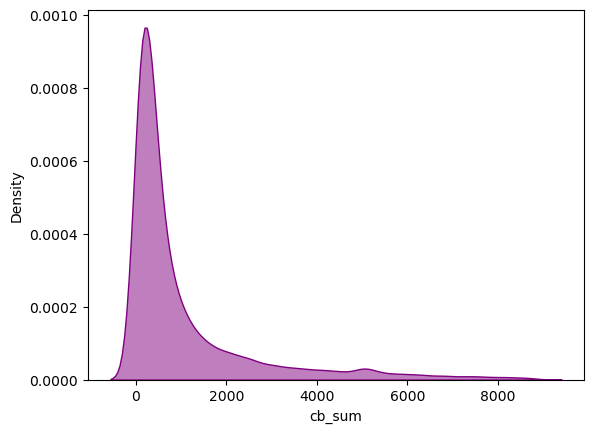

In [48]:
sns.kdeplot(df_2_no_outliers['cb_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

Работаем со столбцом pur_sum

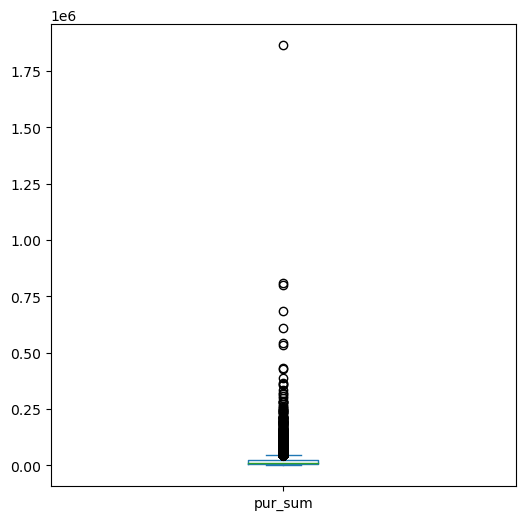

In [49]:
plt.figure(figsize=(6, 6))
df_2_no_outliers['pur_sum'].plot(kind='box')
plt.show()

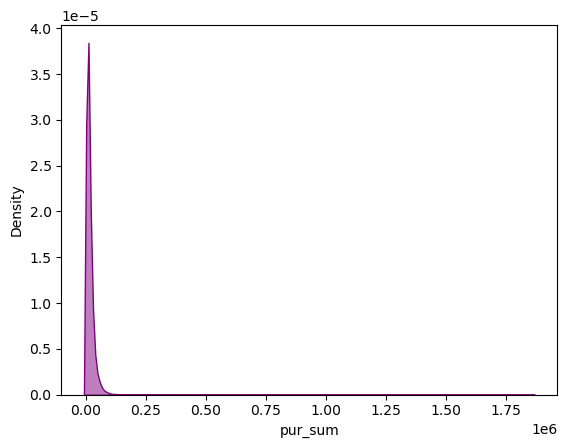

In [50]:
sns.kdeplot(df_2_no_outliers['pur_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

In [51]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_2_no_outliers['pur_sum'])

outliers = (df_2_no_outliers['pur_sum'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 430


In [52]:
#перезапишем датасет без выбросов по полю cb_sum
df_2_no_outliers = df_2_no_outliers[(z_scores < 3) & (z_scores > -3)]

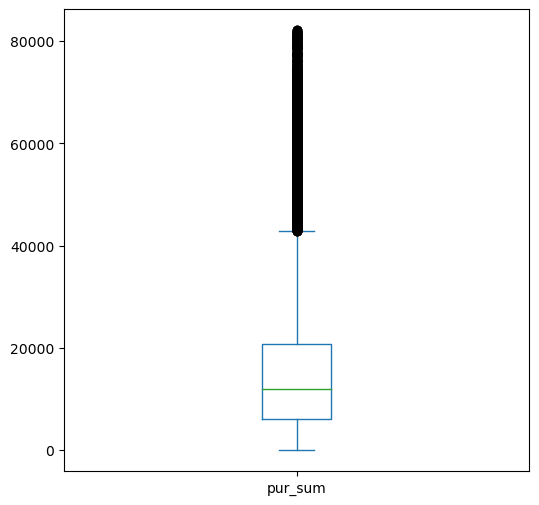

In [53]:
plt.figure(figsize=(6, 6))
df_2_no_outliers['pur_sum'].plot(kind='box')
plt.show()

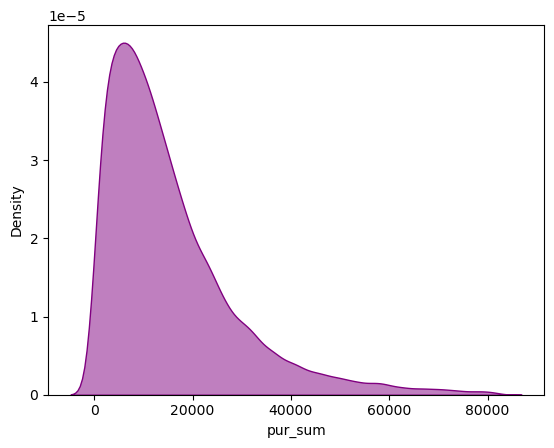

In [54]:
sns.kdeplot(df_2_no_outliers['pur_sum'], color='purple', alpha=0.5, fill=True)
plt.show()

In [55]:
df_2_no_outliers.cov()

,client_id,cb_sum,pur_sum
client_id,5.813349e+16,-2.887021e+10,-9.272236e+11
cb_sum,-2.887021e+10,2.418445e+06,4.966327e+06
pur_sum,-9.272236e+11,4.966327e+06,1.795704e+08


Между cb_sum и pur_sum есть прямая связь, так как коэффициент ковариации больше 0.

In [56]:
df_2_no_outliers.corr(method='kendall')

,client_id,cb_sum,pur_sum
client_id,1.000000,-0.021064,-0.203023
cb_sum,-0.021064,1.000000,0.169672
pur_sum,-0.203023,0.169672,1.000000


Коэффициент корреляции равен 0.17. Связт между рассматриваемыми признаками по шкале Чеддока прямая и слабая. В рамках исследования подтверждаем гипотезу нашу.

<Axes: xlabel='cb_sum', ylabel='pur_sum'>

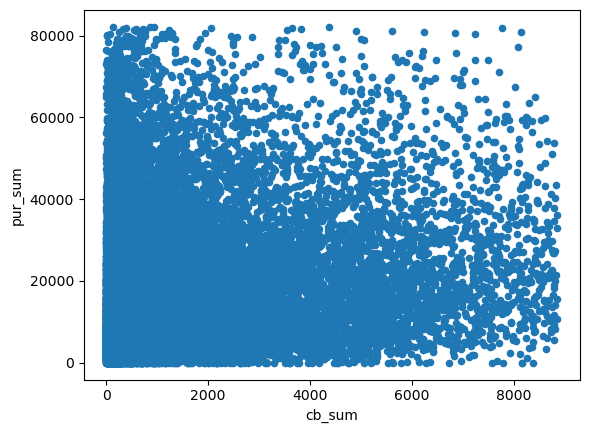

In [57]:
df_2_no_outliers.plot(kind='scatter', x='cb_sum', y='pur_sum')

### 3. 3 месяца назад произошло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления.

In [59]:
# создаем столбец суммы всех покупок до и после обновления
df['sum_last'] = df.iloc[:, 8:25].sum(axis=1)
df['sum_before'] = df.iloc[:, 25:42].sum(axis=1)

In [60]:
# создаем создаем датасет ДО
df_before = df[['cb_bank_before', 'cb_merch_before', 'cnt_communication', 'sum_before']]
df_before['cb_sum_before'] = df_before['cb_bank_before'] + df_before['cb_merch_before'] 

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\2192784662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['cb_sum_before'] = df_before['cb_bank_before'] + df_before['cb_merch_before']


In [61]:
df_before.head()

,cb_bank_before,cb_merch_before,cnt_communication,sum_before,cb_sum_before
0,125.0,119.0,6,16800.0,244.0
1,0.0,0.0,0,14.0,0.0
2,0.0,0.0,0,12474.0,0.0
3,102.0,151.0,3,904.0,253.0
4,179.0,179.0,4,4489.0,358.0


In [62]:
# создаем создаем датасет ПОСЛЕ
df_last = df[['cb_bank_last_3_month', 'cb_merch_last_3_month', 'cnt_communication', 'sum_last']]
df_last['cb_sum_last'] = df_last['cb_bank_last_3_month'] + df_last['cb_merch_last_3_month'] 

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\4071969033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['cb_sum_last'] = df_last['cb_bank_last_3_month'] + df_last['cb_merch_last_3_month']


In [63]:
df_last.head()

,cb_bank_last_3_month,cb_merch_last_3_month,cnt_communication,sum_last,cb_sum_last
0,141.0,282.0,6,12832.0,423.0
1,0.0,0.0,0,0.0,0.0
2,0.0,0.0,0,9775.0,0.0
3,0.0,174.0,3,1164.0,174.0
4,0.0,0.0,4,7707.0,0.0


# Очищаем df_before

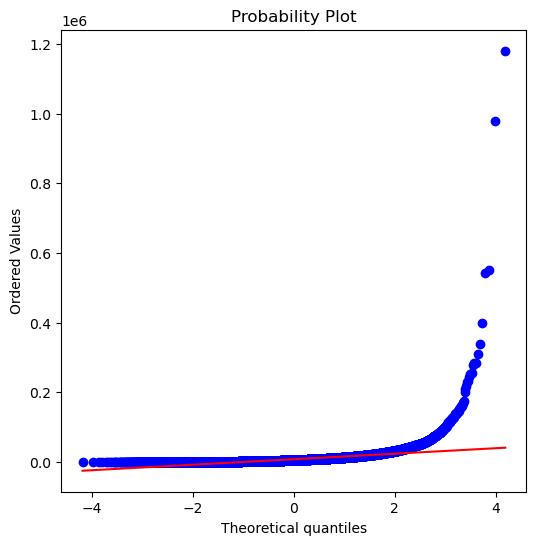

In [64]:
plt.figure(figsize=(6, 6))
st.probplot(df_before['sum_before'], dist='norm', plot=plt)
plt.show()

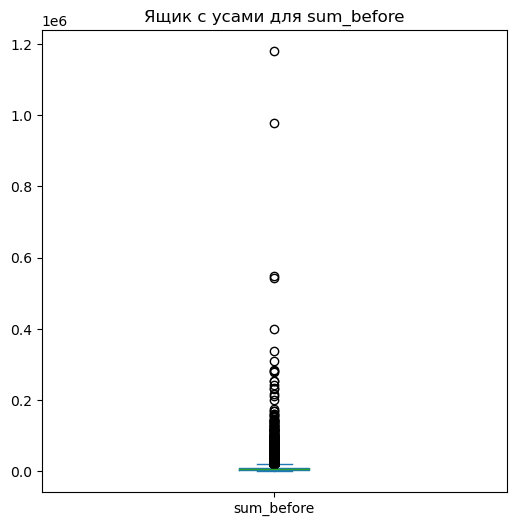

In [65]:
plt.figure(figsize=(6, 6))
df_before['sum_before'].plot(kind='box', title='Ящик с усами для sum_before')
plt.show()

In [66]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_before['sum_before'])

outliers = (df_before['sum_before'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 426


In [67]:
#перезапишем датасет без выбросов по полю cb_sum
df_before_1 = df_before[(z_scores < 3) & (z_scores > -3)]

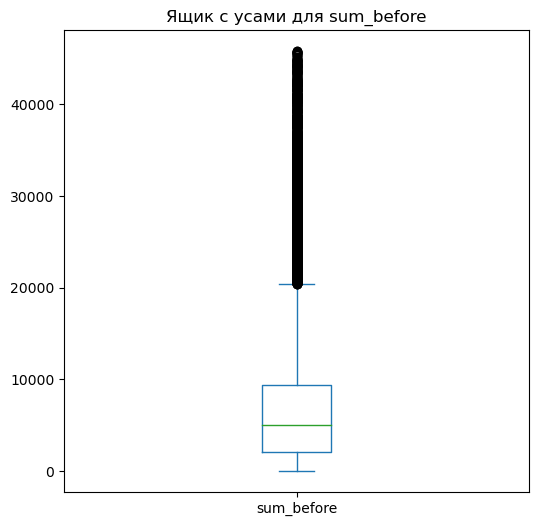

In [68]:
plt.figure(figsize=(6, 6))
df_before_1['sum_before'].plot(kind='box', title='Ящик с усами для sum_before')
plt.show()

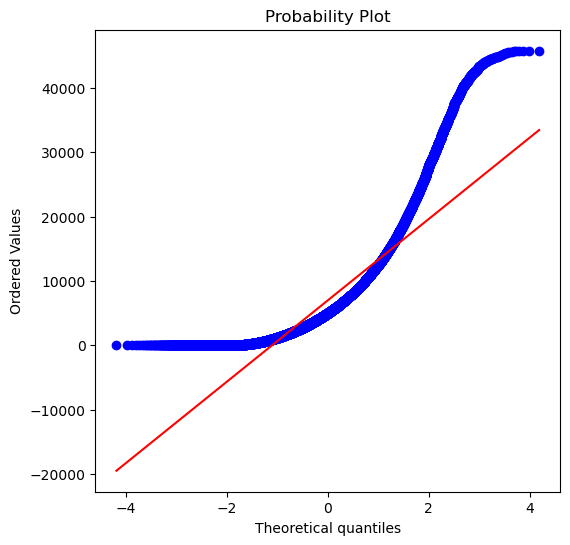

In [69]:
plt.figure(figsize=(6, 6))
st.probplot(df_before_1['sum_before'], dist='norm', plot=plt)
plt.show()

# Очищаем df_last

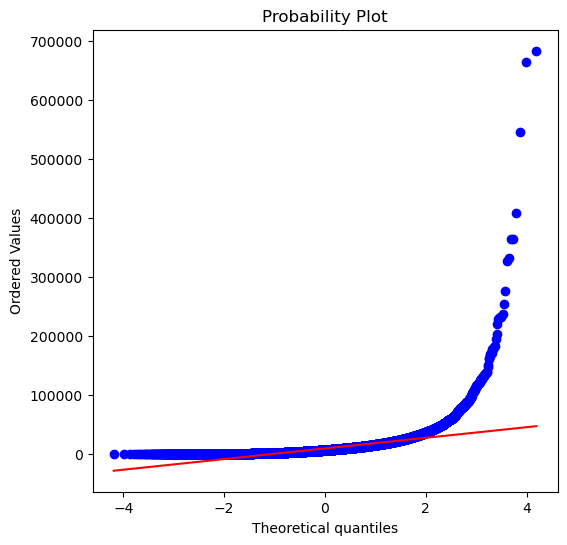

In [70]:
plt.figure(figsize=(6, 6))
st.probplot(df_last['sum_last'], dist='norm', plot=plt)
plt.show()

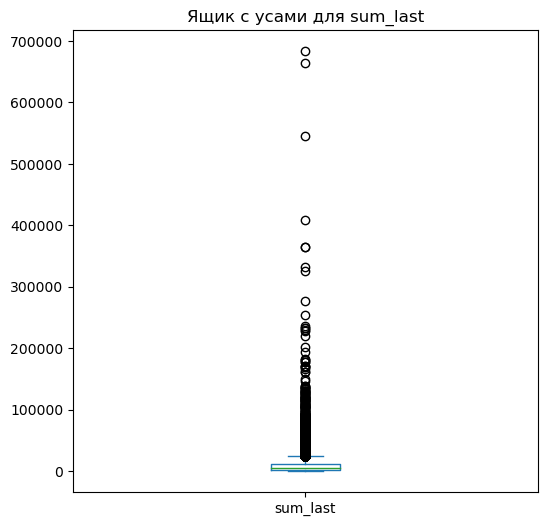

In [71]:
plt.figure(figsize=(6, 6))
df_last['sum_last'].plot(kind='box', title='Ящик с усами для sum_last')
plt.show()

In [72]:
# Z-оценка показывает, насколько каждое значение отклоняется от среднего значения в терминах стандартных отклонений.
z_scores = st.zscore(df_last['sum_last'])

outliers = (df_last['sum_last'][(z_scores > 3) | (z_scores < -3)]).count()
print('Количество выбросов', outliers)

Количество выбросов 586


In [73]:
#перезапишем датасет без выбросов по полю cb_sum
df_last_1 = df_last[(z_scores < 3) & (z_scores > -3)]

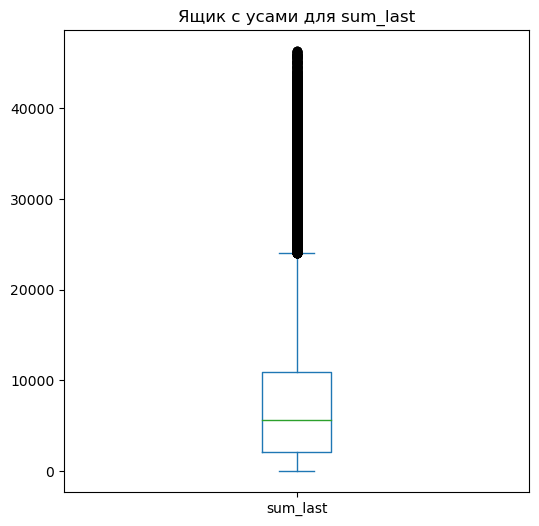

In [74]:
plt.figure(figsize=(6, 6))
df_last_1['sum_last'].plot(kind='box', title='Ящик с усами для sum_last')
plt.show()

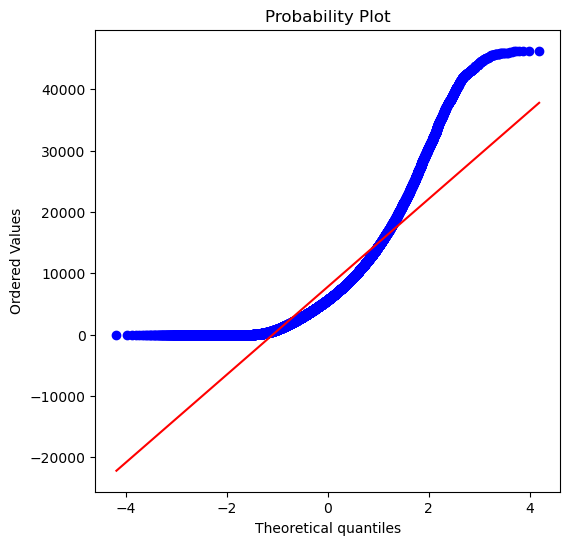

In [75]:
plt.figure(figsize=(6, 6))
st.probplot(df_last_1['sum_last'], dist='norm', plot=plt)
plt.show()

# Проводим тест на равенство средних

In [76]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_last_1['sum_last'], df_before_1['sum_before'])
print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 2.968230989927682e-34
Отклоняем нулевую гипотезу


In [77]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_last_1['sum_last'], df_before_1['sum_before'])
print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and df_before_1['sum_before'].mean() < df_last_1['sum_last'].mean():
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 1.484115494963841e-34
Отклоняем нулевую гипотезу


Так как отклонили нулевую гипотезу о равенстве средних, значит разница средней суммы оборотов покупателей статистически значима с вероятностью 95%. Проведя односторонний тест, можно сделать вывод, что среднее значение суммы не просто изменилось, а увеличилось

# Бакетный тест

In [78]:
df_last_1['bucket'] = pd.qcut(df_last_1['sum_last'], 15, labels=[i for i in range(15)])
df_last_1.head()

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\899649554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_1['bucket'] = pd.qcut(df_last_1['sum_last'], 15, labels=[i for i in range(15)])


,cb_bank_last_3_month,cb_merch_last_3_month,cnt_communication,sum_last,cb_sum_last,bucket
0,141.0,282.0,6,12832.0,423.0,12
1,0.0,0.0,0,0.0,0.0,0
2,0.0,0.0,0,9775.0,0.0,10
3,0.0,174.0,3,1164.0,174.0,2
4,0.0,0.0,4,7707.0,0.0,9


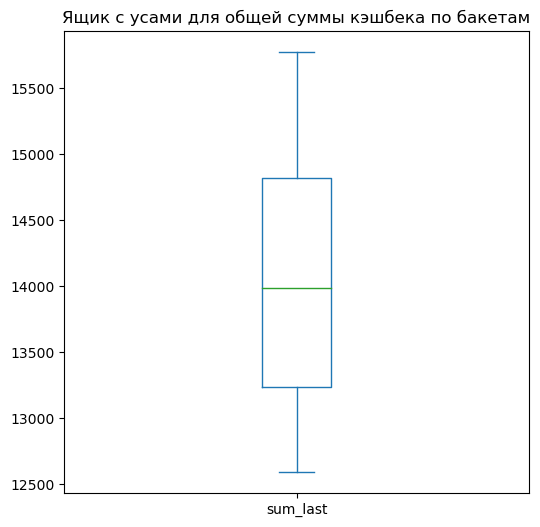

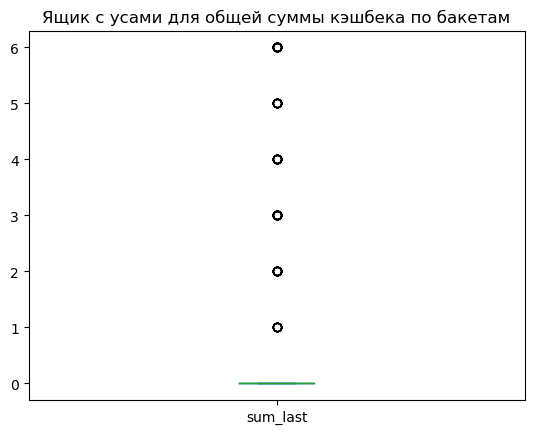

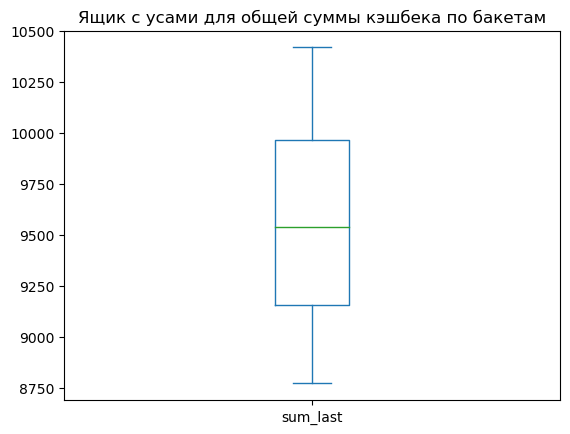

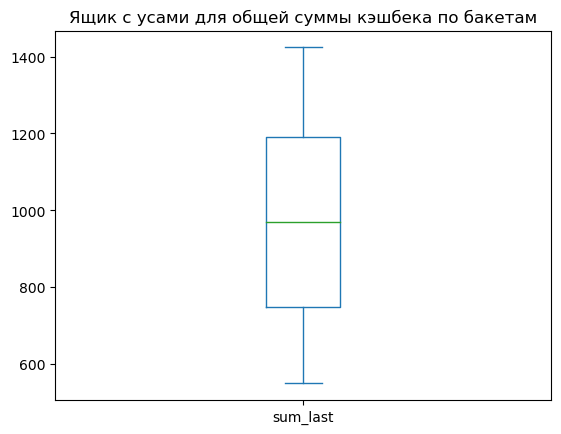

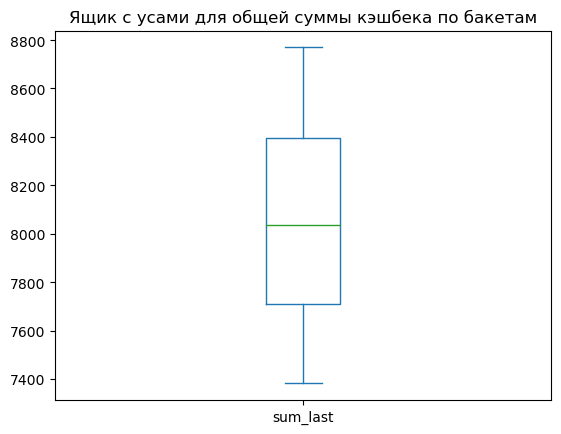

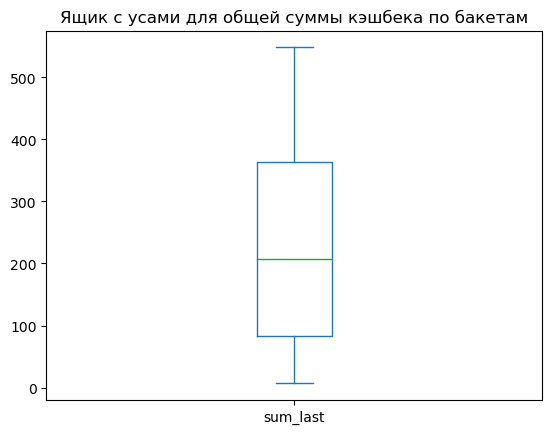

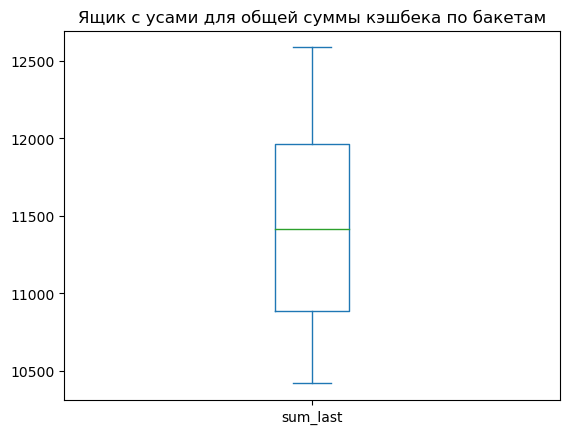

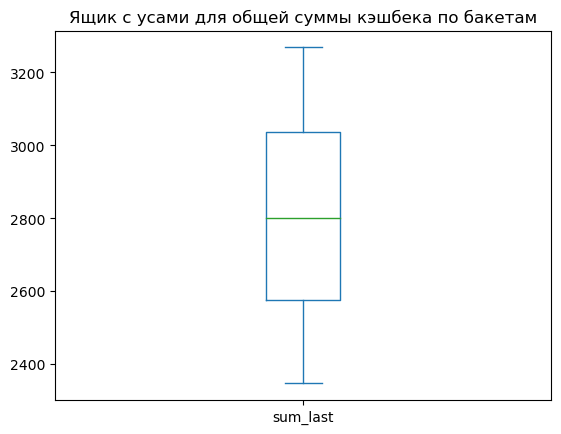

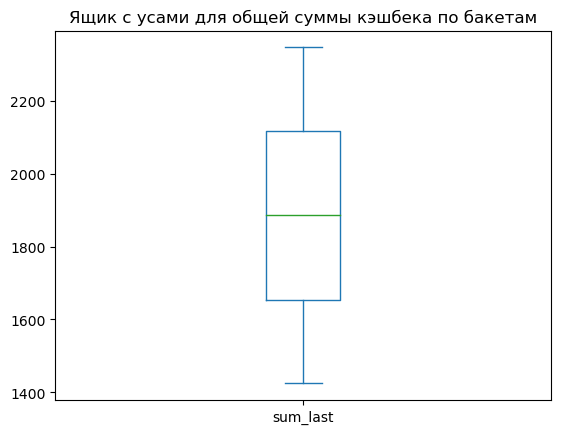

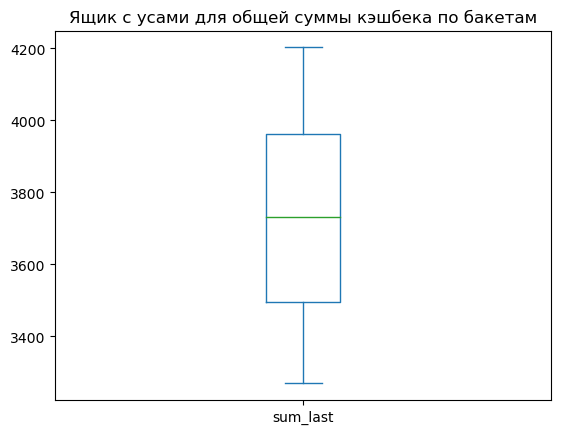

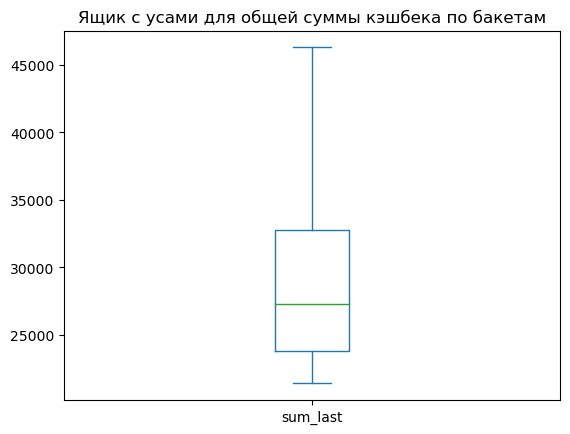

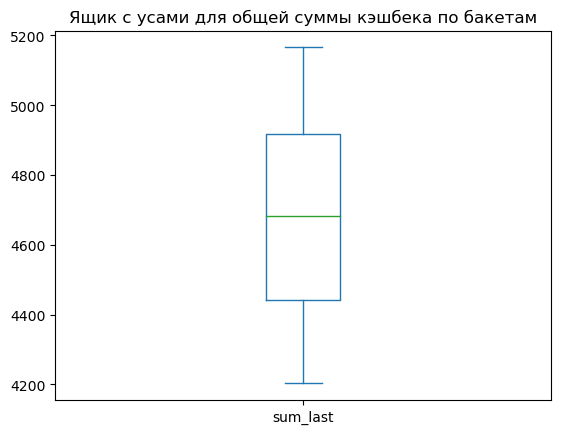

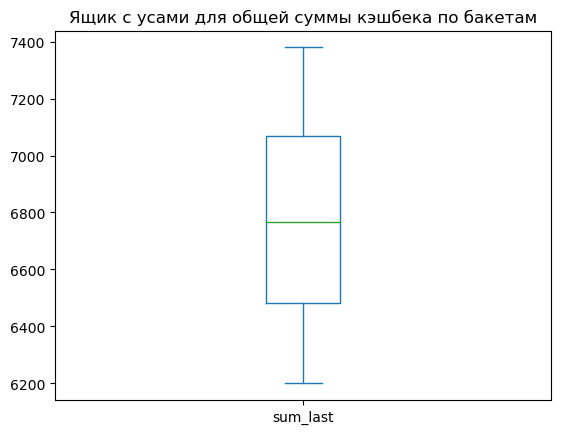

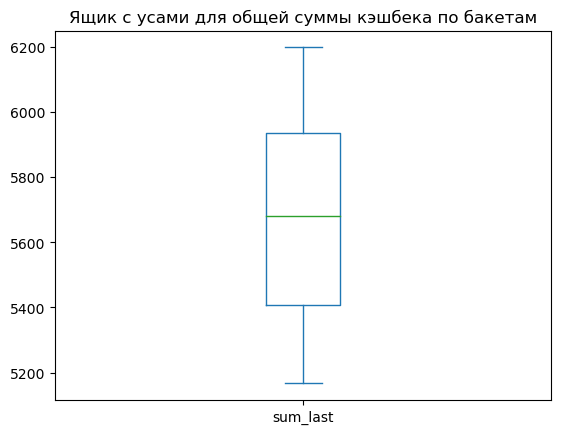

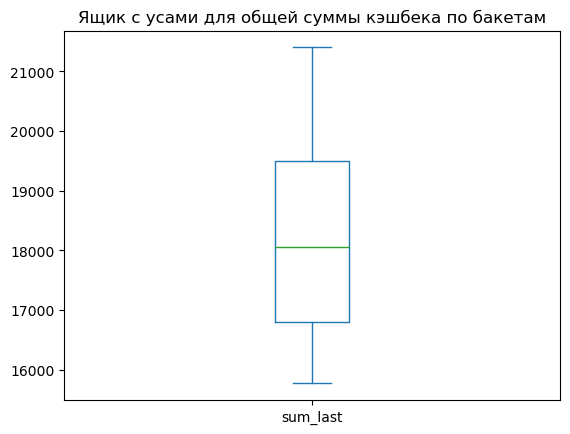

In [79]:
plt.figure(figsize=(6, 6))
for i in df_last_1['bucket'].unique():
    df_last_1[df_last_1['bucket'] == i]['sum_last'].plot(kind='box', title='Ящик с усами для общей суммы кэшбека по бакетам')
    plt.show()

In [80]:
df_last_mean = df_last_1.pivot_table(index=df_last_1['bucket'], aggfunc={"mean", "std"}, values='sum_last').reset_index()
df_last_mean

,bucket,mean,std
0,0,0.093277,0.636007
1,1,230.289930,160.409108
2,2,974.444848,256.045908
3,3,1884.907323,267.055872
4,4,2803.019727,267.049513
5,5,3728.543439,270.865002
6,6,4682.691047,278.317246
7,7,5675.014260,300.628108
8,8,6775.450760,341.557918
9,9,8052.498786,402.996761


In [81]:
last_mean = df_last_mean['mean'].mean()
last_std = df_last_mean['std'].mean()
print(last_mean, last_std)

7805.414950172799 833.6065687940568


In [82]:
df_before_1['bucket'] = pd.qcut(df_before_1['sum_before'], 15, labels=[i for i in range(15)])
df_before_1.head()

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\3789647385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_1['bucket'] = pd.qcut(df_before_1['sum_before'], 15, labels=[i for i in range(15)])


,cb_bank_before,cb_merch_before,cnt_communication,sum_before,cb_sum_before,bucket
0,125.0,119.0,6,16800.0,244.0,13
1,0.0,0.0,0,14.0,0.0,0
2,0.0,0.0,0,12474.0,0.0,12
3,102.0,151.0,3,904.0,253.0,1
4,179.0,179.0,4,4489.0,358.0,6


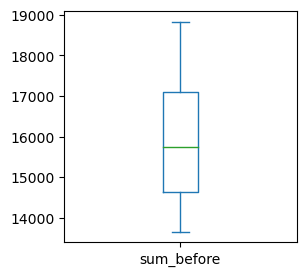

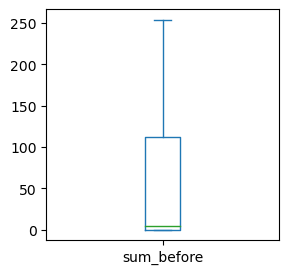

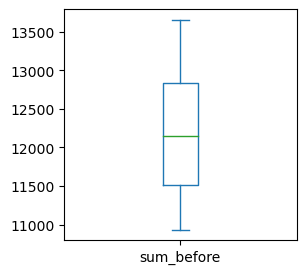

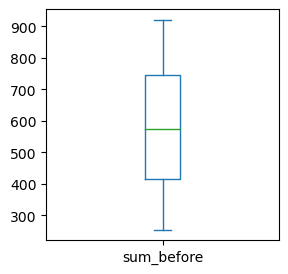

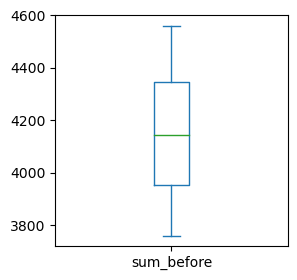

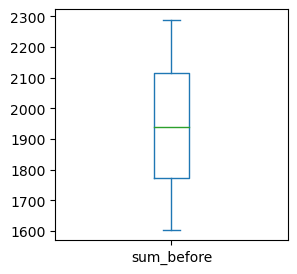

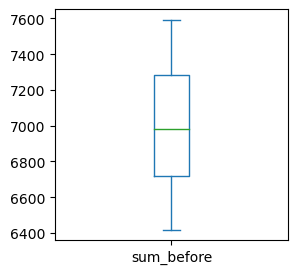

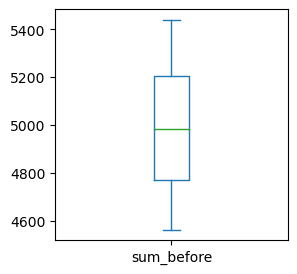

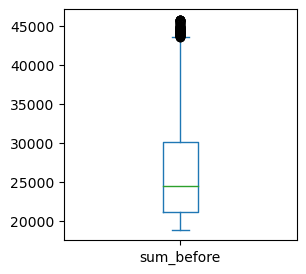

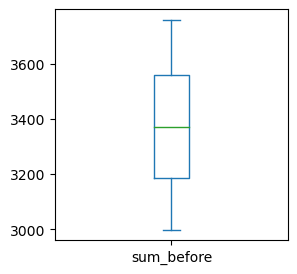

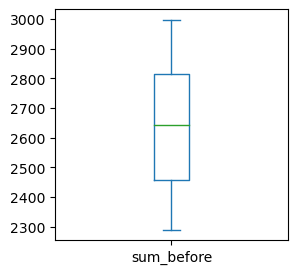

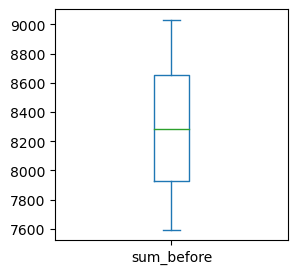

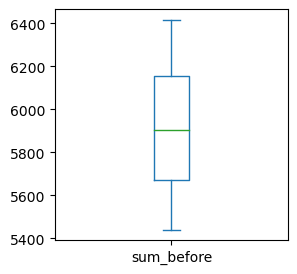

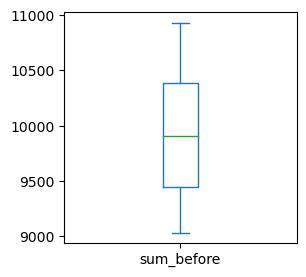

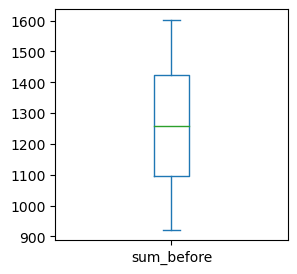

In [86]:
for i in df_before_1['bucket'].unique():
    plt.figure(figsize=(3, 3))
    df_before_1[df_before_1['bucket'] == i]['sum_before'].plot(kind='box')
    plt.show()

In [87]:
df_before_mean = df_before_1.pivot_table(index=df_before_1['bucket'], aggfunc={"mean", "std"}, values='sum_before').reset_index()
before_mean = df_before_mean['mean'].mean()
before_std = df_before_mean['std'].mean()
print(before_mean, before_std)

6977.023488968708 798.7383215883918


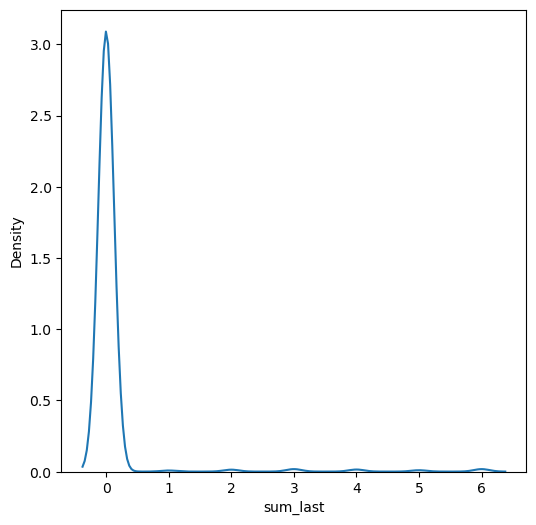

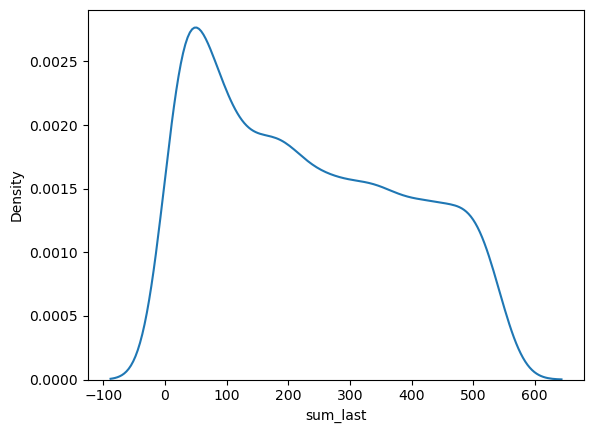

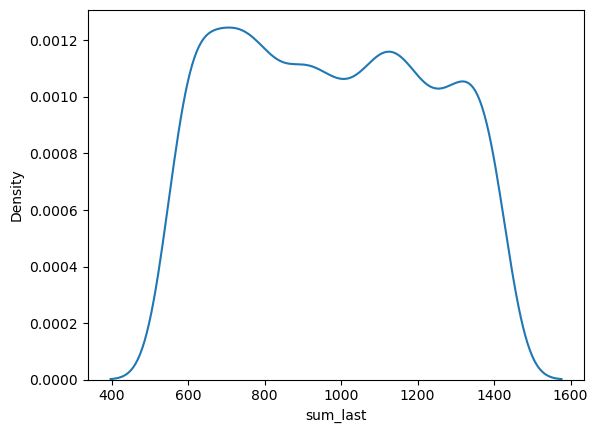

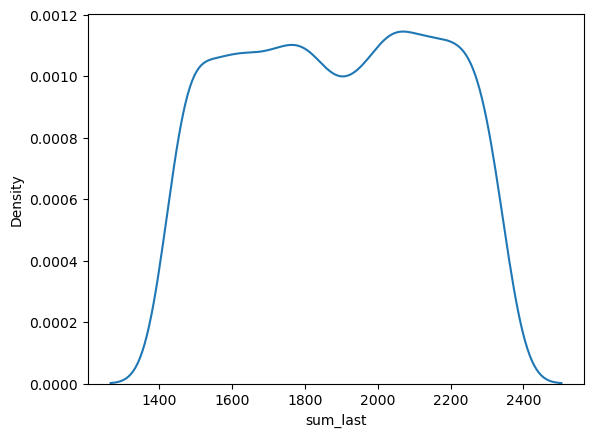

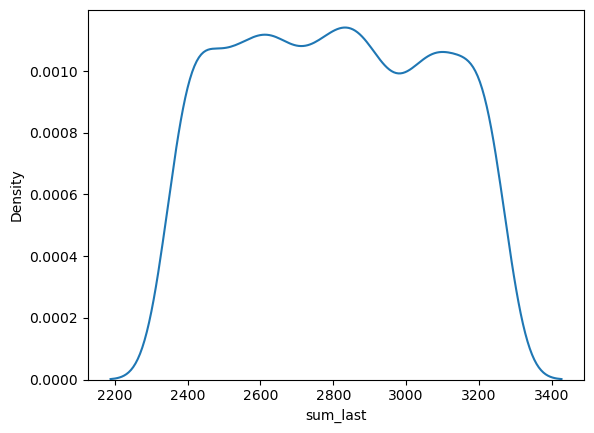

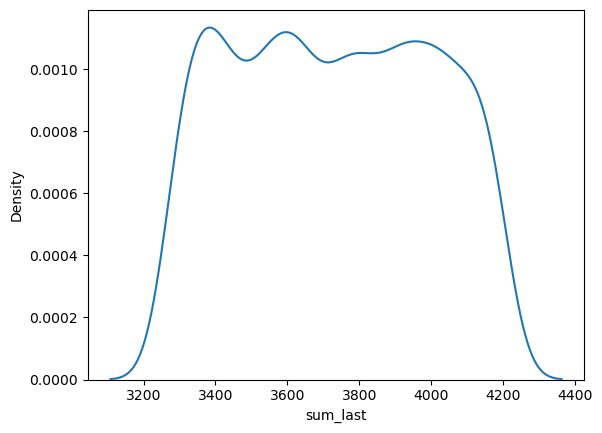

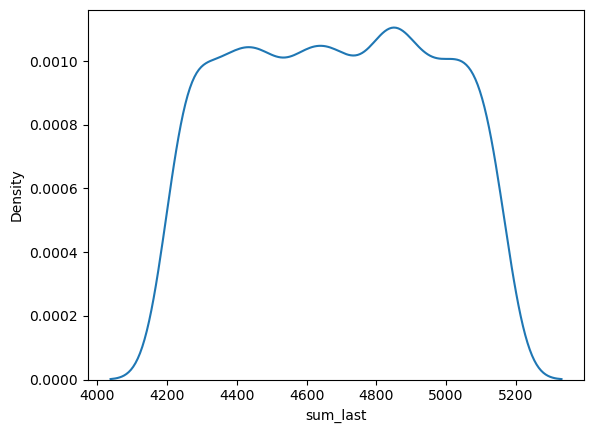

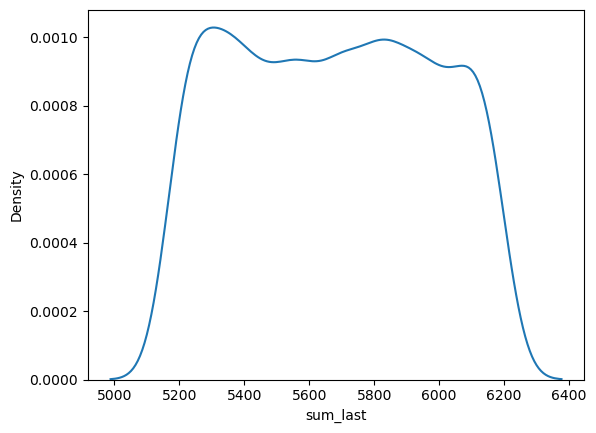

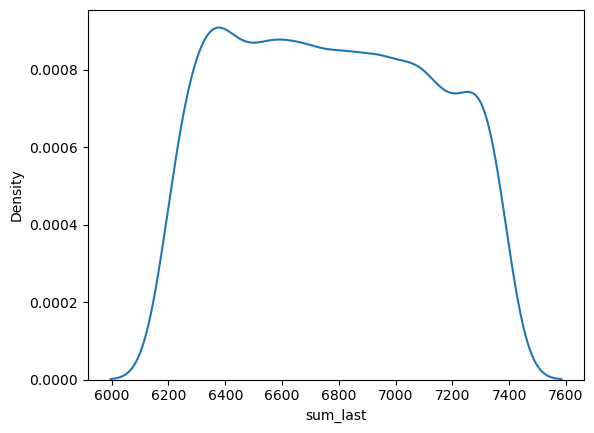

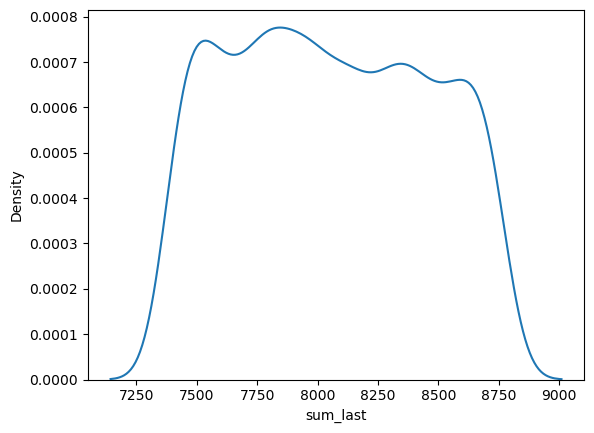

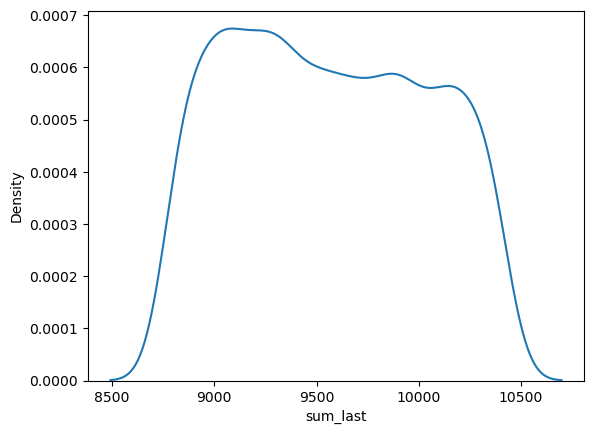

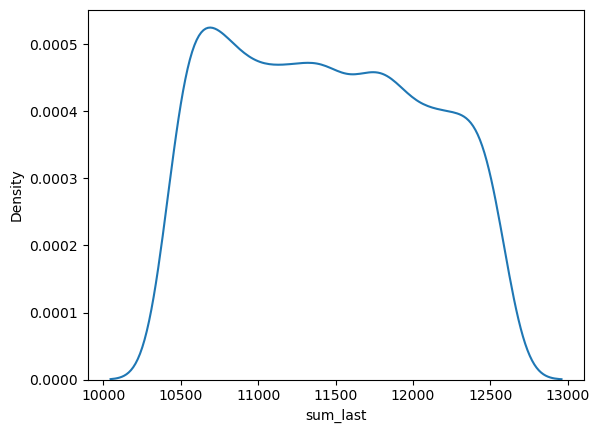

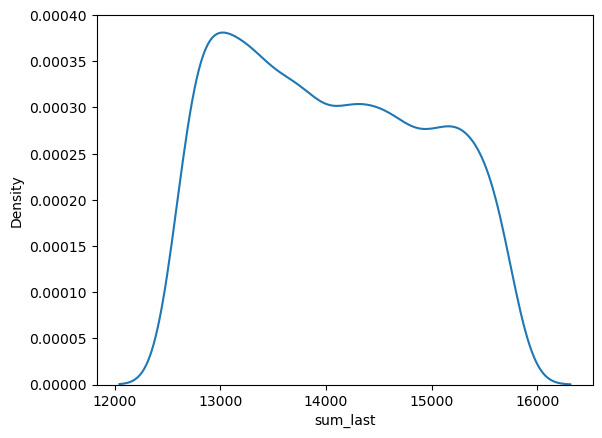

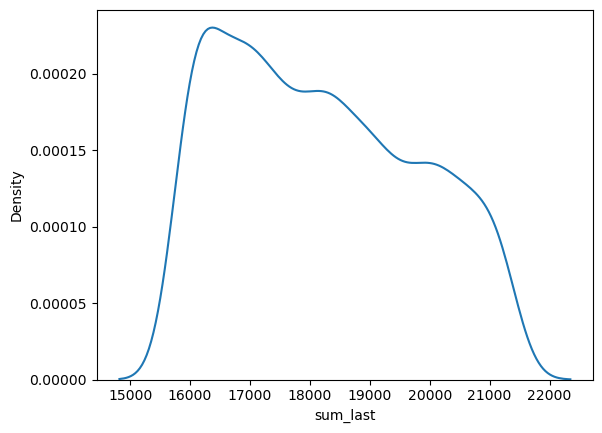

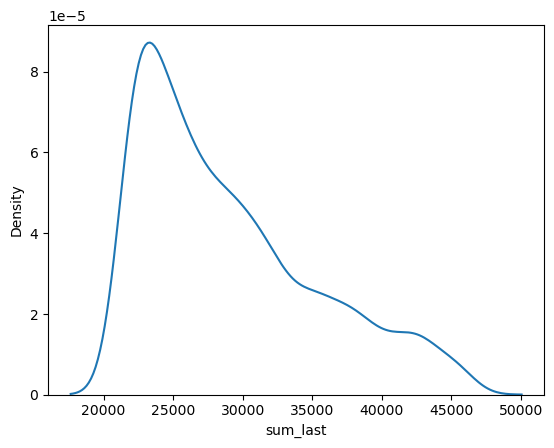

In [88]:
plt.figure(figsize=(6, 6))
for i in range(0,15):
    sns.kdeplot(df_last_1[df_last_1['bucket'] == i]['sum_last'])
    plt.show()

In [89]:
ESE = np.sqrt((before_std ** 2 + last_std ** 2) / 100)
t = (before_mean - last_mean) / ESE
t

-7.175292816752988

In [90]:
ss = (99 * (before_std ** 2 + last_std ** 2) ** 2) / (before_std ** 4 + last_std ** 4)
ss

197.63960884175998

In [91]:
p_value = st.t.sf(abs(t), df=ss)

In [92]:
if p_value < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

Отклоняем нулевую гипотезу


### Смотрим другую метрику (сколько отправили коммуникаций и сколько кешбека получил человек)

In [96]:
# так как мы исследуем зависимость количества отправленных коммуникаций от полученного кешбека и хотим оценить, как коммуникации
# влияют на него, то нет смысла анализировать ситуацию, когда таких коммуникаций не было

df_before_2 = df_before.query("cnt_communication != 0")
df_last_2 = df_last.query("cnt_communication != 0")

In [97]:
df_before_2['cb_to_cnt'] = df_before_2['cb_sum_before'] / df_before_2['cnt_communication']
df_before_2 = df_before_2.fillna(0)
df_before_2 = df_before_2.iloc[:,-4:]
df_before_2

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\2978257585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_2['cb_to_cnt'] = df_before_2['cb_sum_before'] / df_before_2['cnt_communication']


,cnt_communication,sum_before,cb_sum_before,cb_to_cnt
0,6,16800.0,244.0,40.666667
3,3,904.0,253.0,84.333333
4,4,4489.0,358.0,89.500000
5,2,1735.0,0.0,0.000000
6,4,7221.0,57.0,14.250000
...,...,...,...,...
49995,3,4196.0,2555.0,851.666667
49996,1,2333.0,5.0,5.000000
49997,1,1861.0,0.0,0.000000
49998,3,12949.0,488.0,162.666667


In [98]:
df_last_2['cb_to_cnt'] = df_last_2['cb_sum_last'] / df_last_2['cnt_communication']
df_last_2 = df_last_2.fillna(0)
df_last_2 = df_last_2.iloc[:,-4:]
df_last_2

C:\Users\Elizaveta\AppData\Local\Temp\ipykernel_19152\3186206953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_2['cb_to_cnt'] = df_last_2['cb_sum_last'] / df_last_2['cnt_communication']


,cnt_communication,sum_last,cb_sum_last,cb_to_cnt
0,6,12832.0,423.0,70.50
3,3,1164.0,174.0,58.00
4,4,7707.0,0.0,0.00
5,2,161.0,0.0,0.00
6,4,10506.0,147.0,36.75
...,...,...,...,...
49995,3,19188.0,0.0,0.00
49996,1,3284.0,131.0,131.00
49997,1,3785.0,448.0,448.00
49998,3,17260.0,0.0,0.00


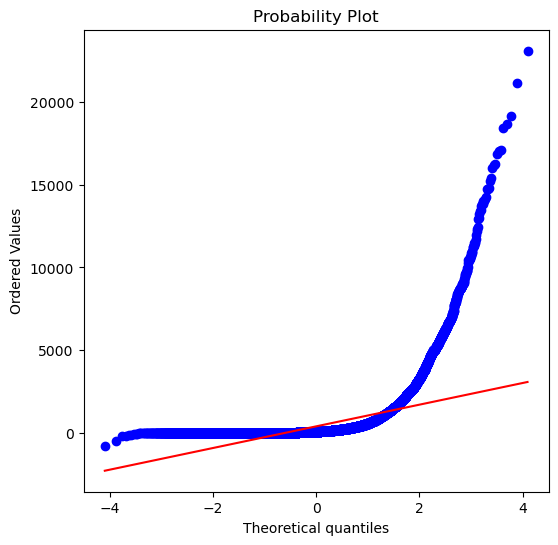

In [99]:
plt.figure(figsize=(6, 6))
st.probplot(df_before_2['cb_to_cnt'], dist='norm', plot=plt)
plt.show()

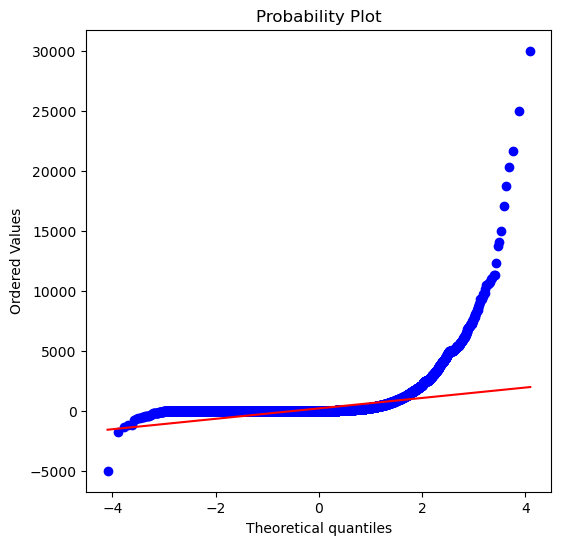

In [100]:
plt.figure(figsize=(6, 6))
st.probplot(df_last_2['cb_to_cnt'], dist='norm', plot=plt)
plt.show()

Используем непараметрический тест

In [101]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_before_2['cb_to_cnt'], df_last_2['cb_to_cnt'])
print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 0.0
Отклоняем нулевую гипотезу


In [102]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_before_2['cb_to_cnt'], df_last_2['cb_to_cnt'])
print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and df_before_1['sum_before'].mean() < df_last_1['sum_last'].mean():
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 0.0
Отклоняем нулевую гипотезу


#### Гипотеза: увеличилaсь сумма рублей покупки к кэшбэку после обновления

In [107]:
df_before_2['pur_to_cb'] =  df_before_2['sum_before'] / df_before_2['cb_sum_before']
df_before_3 = df_before_2.query("cb_sum_before != 0")
df_before_3

,cnt_communication,sum_before,cb_sum_before,cb_to_cnt,pur_to_cb
0,6,16800.0,244.0,40.666667,68.852459
3,3,904.0,253.0,84.333333,3.573123
4,4,4489.0,358.0,89.500000,12.539106
6,4,7221.0,57.0,14.250000,126.684211
8,1,6998.0,86.0,86.000000,81.372093
...,...,...,...,...,...
49994,1,1980.0,1096.0,1096.000000,1.806569
49995,3,4196.0,2555.0,851.666667,1.642270
49996,1,2333.0,5.0,5.000000,466.600000
49998,3,12949.0,488.0,162.666667,26.534836


In [108]:
df_last_2['pur_to_cb'] =  df_last_2['sum_last'] / df_last_2['cb_sum_last']
df_last_3 = df_last_2.query("cb_sum_last != 0")
df_last_3

,cnt_communication,sum_last,cb_sum_last,cb_to_cnt,pur_to_cb
0,6,12832.0,423.0,70.50,30.335697
3,3,1164.0,174.0,58.00,6.689655
6,4,10506.0,147.0,36.75,71.469388
11,1,3338.0,15.0,15.00,222.533333
16,1,6252.0,10.0,10.00,625.200000
...,...,...,...,...,...
49992,3,10890.0,2313.0,771.00,4.708171
49994,1,4695.0,1080.0,1080.00,4.347222
49996,1,3284.0,131.0,131.00,25.068702
49997,1,3785.0,448.0,448.00,8.448661


In [109]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_before_3['pur_to_cb'], df_last_3['pur_to_cb'])
print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 2.764557811294887e-150
Отклоняем нулевую гипотезу


In [110]:
# проведем тест Уилкоксона-Манна-Уитни
alpha = 0.05
results = st.mannwhitneyu(df_before_3['pur_to_cb'], df_last_3['pur_to_cb'])
print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and df_before_1['sum_before'].mean() < df_last_1['sum_last'].mean():
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value 1.3822789056474435e-150
Отклоняем нулевую гипотезу


# Гипотеза: клиенты, которым отправлено больше коммуникаций, совершают траты в большем количестве категорий

In [120]:
df['cnt_communication'].unique()

array([ 6,  0,  3,  4,  2,  1,  5,  7,  8,  9, 13, 11, 10, 15, 12, 14, 17,
       18], dtype=int64)

In [121]:
df['client_id'].count()

50000

In [122]:
data = df.pivot_table(index='cnt_communication', aggfunc='count', values='client_id').reset_index()
data

,cnt_communication,client_id
0,0,17142
1,1,9182
2,2,9277
3,3,6183
4,4,3994
5,5,2621
6,6,1048
7,7,324
8,8,128
9,9,49


In [149]:
df.loc[(df['cnt_communication'] < 1), 'group'] = 'не отправлено'
df.loc[(df['cnt_communication'] > 0) & (df['cnt_communication'] < 3), 'group'] = 'отправлено мало'
df.loc[(df['cnt_communication'] >= 3), 'group'] = 'отправлено много'

#посмотрим, что получилось
df.head()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,air,beauty shop,...,cb_sum,cb__bank_sum,cb__merch_sum,pur_sum,sum_last,sum_before,group,num_last,num_before,num_category
0,162353149,282.0,141.0,119.0,125.0,6,229,606,0.0,109.0,...,667.0,266.0,401.0,29632.0,12832.0,16800.0,отправлено много,11.0,13.0,12.50
1,666605735,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,14.0,не отправлено,0.0,2.0,1.50
2,558610079,0.0,0.0,0.0,0.0,0,51,77,2585.0,0.0,...,0.0,0.0,0.0,22249.0,9775.0,12474.0,не отправлено,9.0,9.0,9.00
3,769974329,174.0,0.0,151.0,102.0,3,137,375,0.0,0.0,...,427.0,102.0,325.0,2068.0,1164.0,904.0,отправлено много,5.0,6.0,5.75
4,350605405,0.0,0.0,179.0,179.0,4,18,24,0.0,634.0,...,358.0,179.0,179.0,12196.0,7707.0,4489.0,отправлено много,8.0,10.0,9.50


In [151]:
columns_last = df.iloc[:, 8:25].columns

for i in range(len(df)):
    last_nonzero = 0  # Переменная для подсчета ненулевых значений в каждой строке
    for column in columns_last:
        if df.loc[i, column] != 0:
            last_nonzero += 1
    df.loc[i, 'num_last'] = last_nonzero

In [152]:
columns_before = df.iloc[:, 25:42].columns

for i in range(len(df)):
    before_nonzero = 0  
    for column in columns_before:
        if df.loc[i, column] != 0:
            before_nonzero += 1
    df.loc[i, 'num_before'] = before_nonzero

In [153]:
df.iloc[:,-3:]

,num_last,num_before,num_category
0,11.0,13.0,12.50
1,0.0,2.0,1.50
2,9.0,9.0,9.00
3,5.0,6.0,5.75
4,8.0,10.0,9.50
...,...,...,...
49995,9.0,9.0,9.00
49996,9.0,11.0,10.50
49997,8.0,8.0,8.00
49998,9.0,12.0,11.25


In [155]:
data = df.pivot_table(index='group', aggfunc='mean', values=['num_before', 'num_last']).reset_index()
data

,group,num_before,num_last
0,не отправлено,8.588788,6.254229
1,отправлено мало,9.275800,7.628149
2,отправлено много,9.329676,8.142649


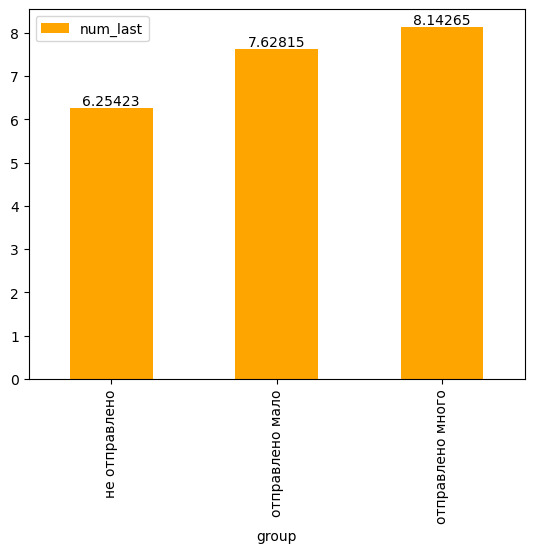

In [156]:
ax = data.plot(kind='bar',
        x='group',
        y='num_last',
        color = 'orange')

ax.bar_label(ax.containers[0])
plt.show()

In [157]:
df['num_category'] = (df['num_before'] * 0.75 + df['num_last'] * 0.25) / 1

In [158]:
df.iloc[:,-4:]

,group,num_last,num_before,num_category
0,отправлено много,11.0,13.0,12.50
1,не отправлено,0.0,2.0,1.50
2,не отправлено,9.0,9.0,9.00
3,отправлено много,5.0,6.0,5.75
4,отправлено много,8.0,10.0,9.50
...,...,...,...,...
49995,отправлено много,9.0,9.0,9.00
49996,отправлено мало,9.0,11.0,10.50
49997,отправлено мало,8.0,8.0,8.00
49998,отправлено много,9.0,12.0,11.25


In [159]:
data_1 = df.pivot_table(index='group', aggfunc='median', values='num_category').reset_index()
data_1

,group,num_category
0,не отправлено,8.50
1,отправлено мало,9.25
2,отправлено много,9.25


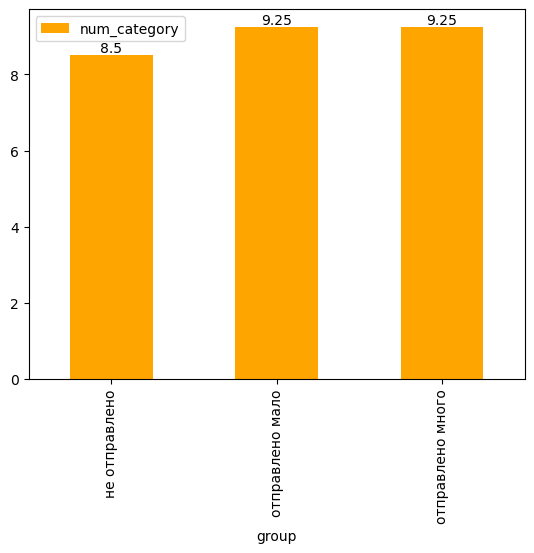

In [160]:
ax = data_1.plot(kind='bar',
            x='group',
            y='num_category',
            color = 'orange')

ax.bar_label(ax.containers[0])
plt.show()

[Text(0, 0, '8.5'), Text(0, 0, '9.25'), Text(0, 0, '9.25')]

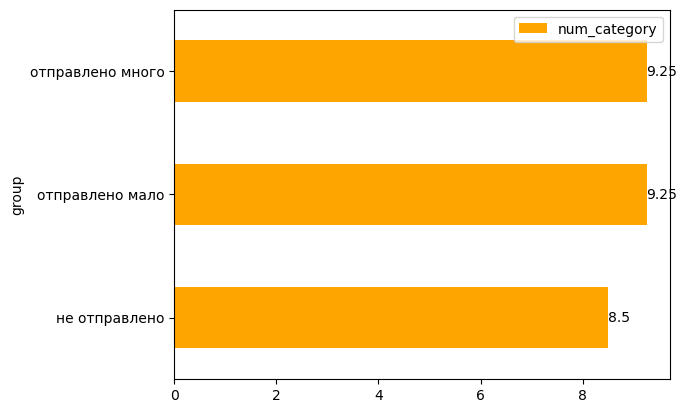

In [161]:
# Создание столбчатой диаграммы
ax = data_1.plot(kind='barh', x='group', y='num_category', color='orange')

# Добавление подписей под столбцами
ax.bar_label(ax.containers[0])